### 作業
理解範例後請嘗試將關鍵點畫在圖像上，確保圖像及資料有正確讀取。
Hint: 可以用 [matplotlib 的 scatter](https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html) 或者 [opencv 的 cv2.circle](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html)

### 範例
接下來的程式碼會示範如何讀取 kaggle facial keypoint detection 資料集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 使用 colab 環境的同學請執行以下程式碼
# %tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
# import tensorflow as tf
# print(tf.__version__)

# import os
# from google.colab import drive 
# drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# %cd 'gdrive/My Drive'
# os.system("mkdir cupoy_cv_part4") # 可以自己改路徑
# %cd cupoy_cv_part4 # 可以自己改路徑

In [3]:
# 如果要使用 kaggle API 下載資料的話，請用以下程式碼
# os.environ['KAGGLE_USERNAME'] = '____' # 請按照 Day42 簡報內容，獲取 kaggle api 需要用到的 username
# os.environ['KAGGLE_KEY'] = '____' # 請按照 Day42 簡報獲取 kaggle api 需要用到的 key
# !kaggle competitions download -c facial-keypoints-detection
# !unzip test.zip
# !unzip training.zip

### 資料前處理
資料分為兩部分，一個是關鍵點坐標，總共 15 個關鍵點，所以坐標相關的值有 15 x 2 = 30 維；
另外還有 96 x 96 的灰階像素值。

讀取資料後，先簡單地過濾有缺失某些關鍵點坐標的資料，然後再把資料 scale 到 [-0.5, 0.5] 的範圍

In [4]:
# 讀取 csv 文件
data = pd.read_csv("training.csv")

In [5]:
# 前 5 筆資料, .T 的作用是轉置，如果不理解可以和 data.head() 的結果相比較
data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [6]:
data['Image'][0]

2 157 116 82 81 88 88 85 114 138 127 109 95 101 121 121 128 150 164 160 155 149 146 148 153 150 139 134 128 124 123 123 118 107 98 114 163 155 96 126 93 72 125 98 90 145 130 96 86 103 97 92 113 122 125 129 129 131 129 116 95 66 51 50 37 34 47 54 49 58 72 88 82 71 59 56 56 48 50 52 44 29 25 79 140 159 150 138 129 128 131 136 138 131 122 112 113 122 123 112 107 105 110 119 126 122 114 110 109 116 124 123 137 157 165 159 155 147 142 146 150 149 141 135 128 130 131 121 107 103 106 131 164 142 86 100 86 66 94 90 88 144 156 115 84 87 97 94 105 121 124 129 131 134 134 118 97 62 48 47 34 33 45 52 51 58 69 85 77 67 57 56 54 49 48 53 43 28 37 93 156 160 153 145 143 141 139 140 140 140 131 122 111 112 113 115 116 121 128 125 122 114 116 121 125 128 128 133 144 165 167 165 152 145 144 146 149 148 146 136 133 128 132 120 106 105 109 123 148 144 97 91 89 83 90 78 95 158 159 125 98 85 93 105 104 114 123 130 132 141 134 120 95 62 52 47 34 32 41 47 52 60 65 81 75 61 53 56 53 43 44 47 41 30 45 122 161 1

用 pandas 讀取 csv 文件後可以發現前 30 個 column 是坐標值，最後一個 column 是圖片像素值的字串 (以空白鍵區隔)，接下來我們就以下的函數來做資料的讀取以及前處理，請盡量仔細理解這個函數

In [7]:
# 過濾有缺失值的 row
data = data.dropna()

# 將圖片像素值讀取為 numpy array 的形態
data['Image'] = data['Image'].apply(lambda img: np.fromstring(img, sep=' ')).values 

# 單獨把圖像 array 抽取出來
imgs = np.vstack(data['Image'].values)/255
# reshape 為 96 x 96
imgs = imgs.reshape(data.shape[0], 96, 96)
# 轉換為 float
imgs = imgs.astype(np.float32)

# 提取坐標的部分
points = data[data.columns[:-1]].values

# 轉換為 float
points = points.astype(np.float32)

# normalize 坐標值到 [-0.5, 0.5]
points = points/96 - 0.5

In [8]:
print("圖像資料:", imgs.shape, "\n關鍵點資料:", points.shape)

圖像資料: (2140, 96, 96) 
關鍵點資料: (2140, 30)


In [9]:
sample_img = imgs[0]
sample_points = points[0]

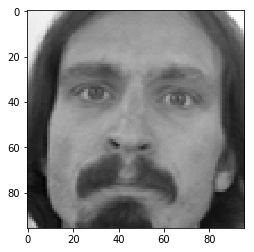

In [10]:
plt.imshow(sample_img, cmap='gray')

In [11]:
def plt_featurepoint(sample_point):
    for i in range(0,30,2):
        x = ( sample_points[i] + 0.5 ) * 96
        y = ( sample_points[i + 1] + 0.5 ) * 96
        plt.scatter(x, y)

In [13]:
plt.imshow(sample_img, cmap='gray')
plt_featurepoint(sample_points)

IndexError: index 30 is out of bounds for axis 0 with size 30